In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


In [1]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


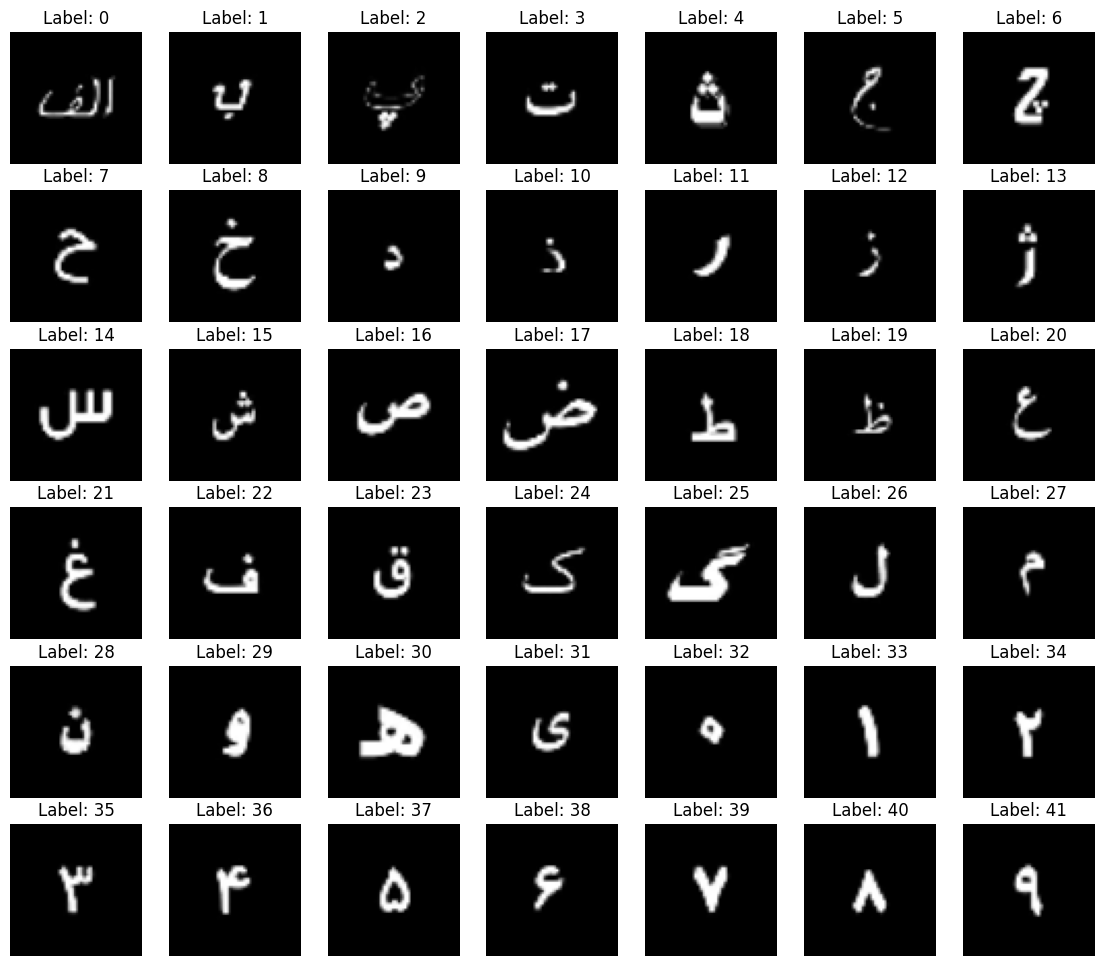

In [3]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [4]:
svm = SVC()

svm_params = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4]}

svm_grid_srch = GridSearchCV(svm, param_grid=svm_params, verbose=2)
svm_grid_srch.fit(X_train_1d, y_train)

print(f">> Best Params : {svm_grid_srch.best_params_}")
print(f">> Best Score : {svm_grid_srch.best_score_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   6.1s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   6.6s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   5.9s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   6.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   6.2s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=  25.3s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=  25.2s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=  24.9s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=  33.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=  32.3s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=  24.5s
[CV] END ..........C=0.1, degree=2, gamma=scale

In [5]:
best_svm = svm_grid_srch.best_estimator_
best_svm.fit(X_train_1d, y_train)

SVC(C=100, degree=2)

Validation Accuracy : 0.9383720930232559
(860,)
(860, 43)
(860, 43)


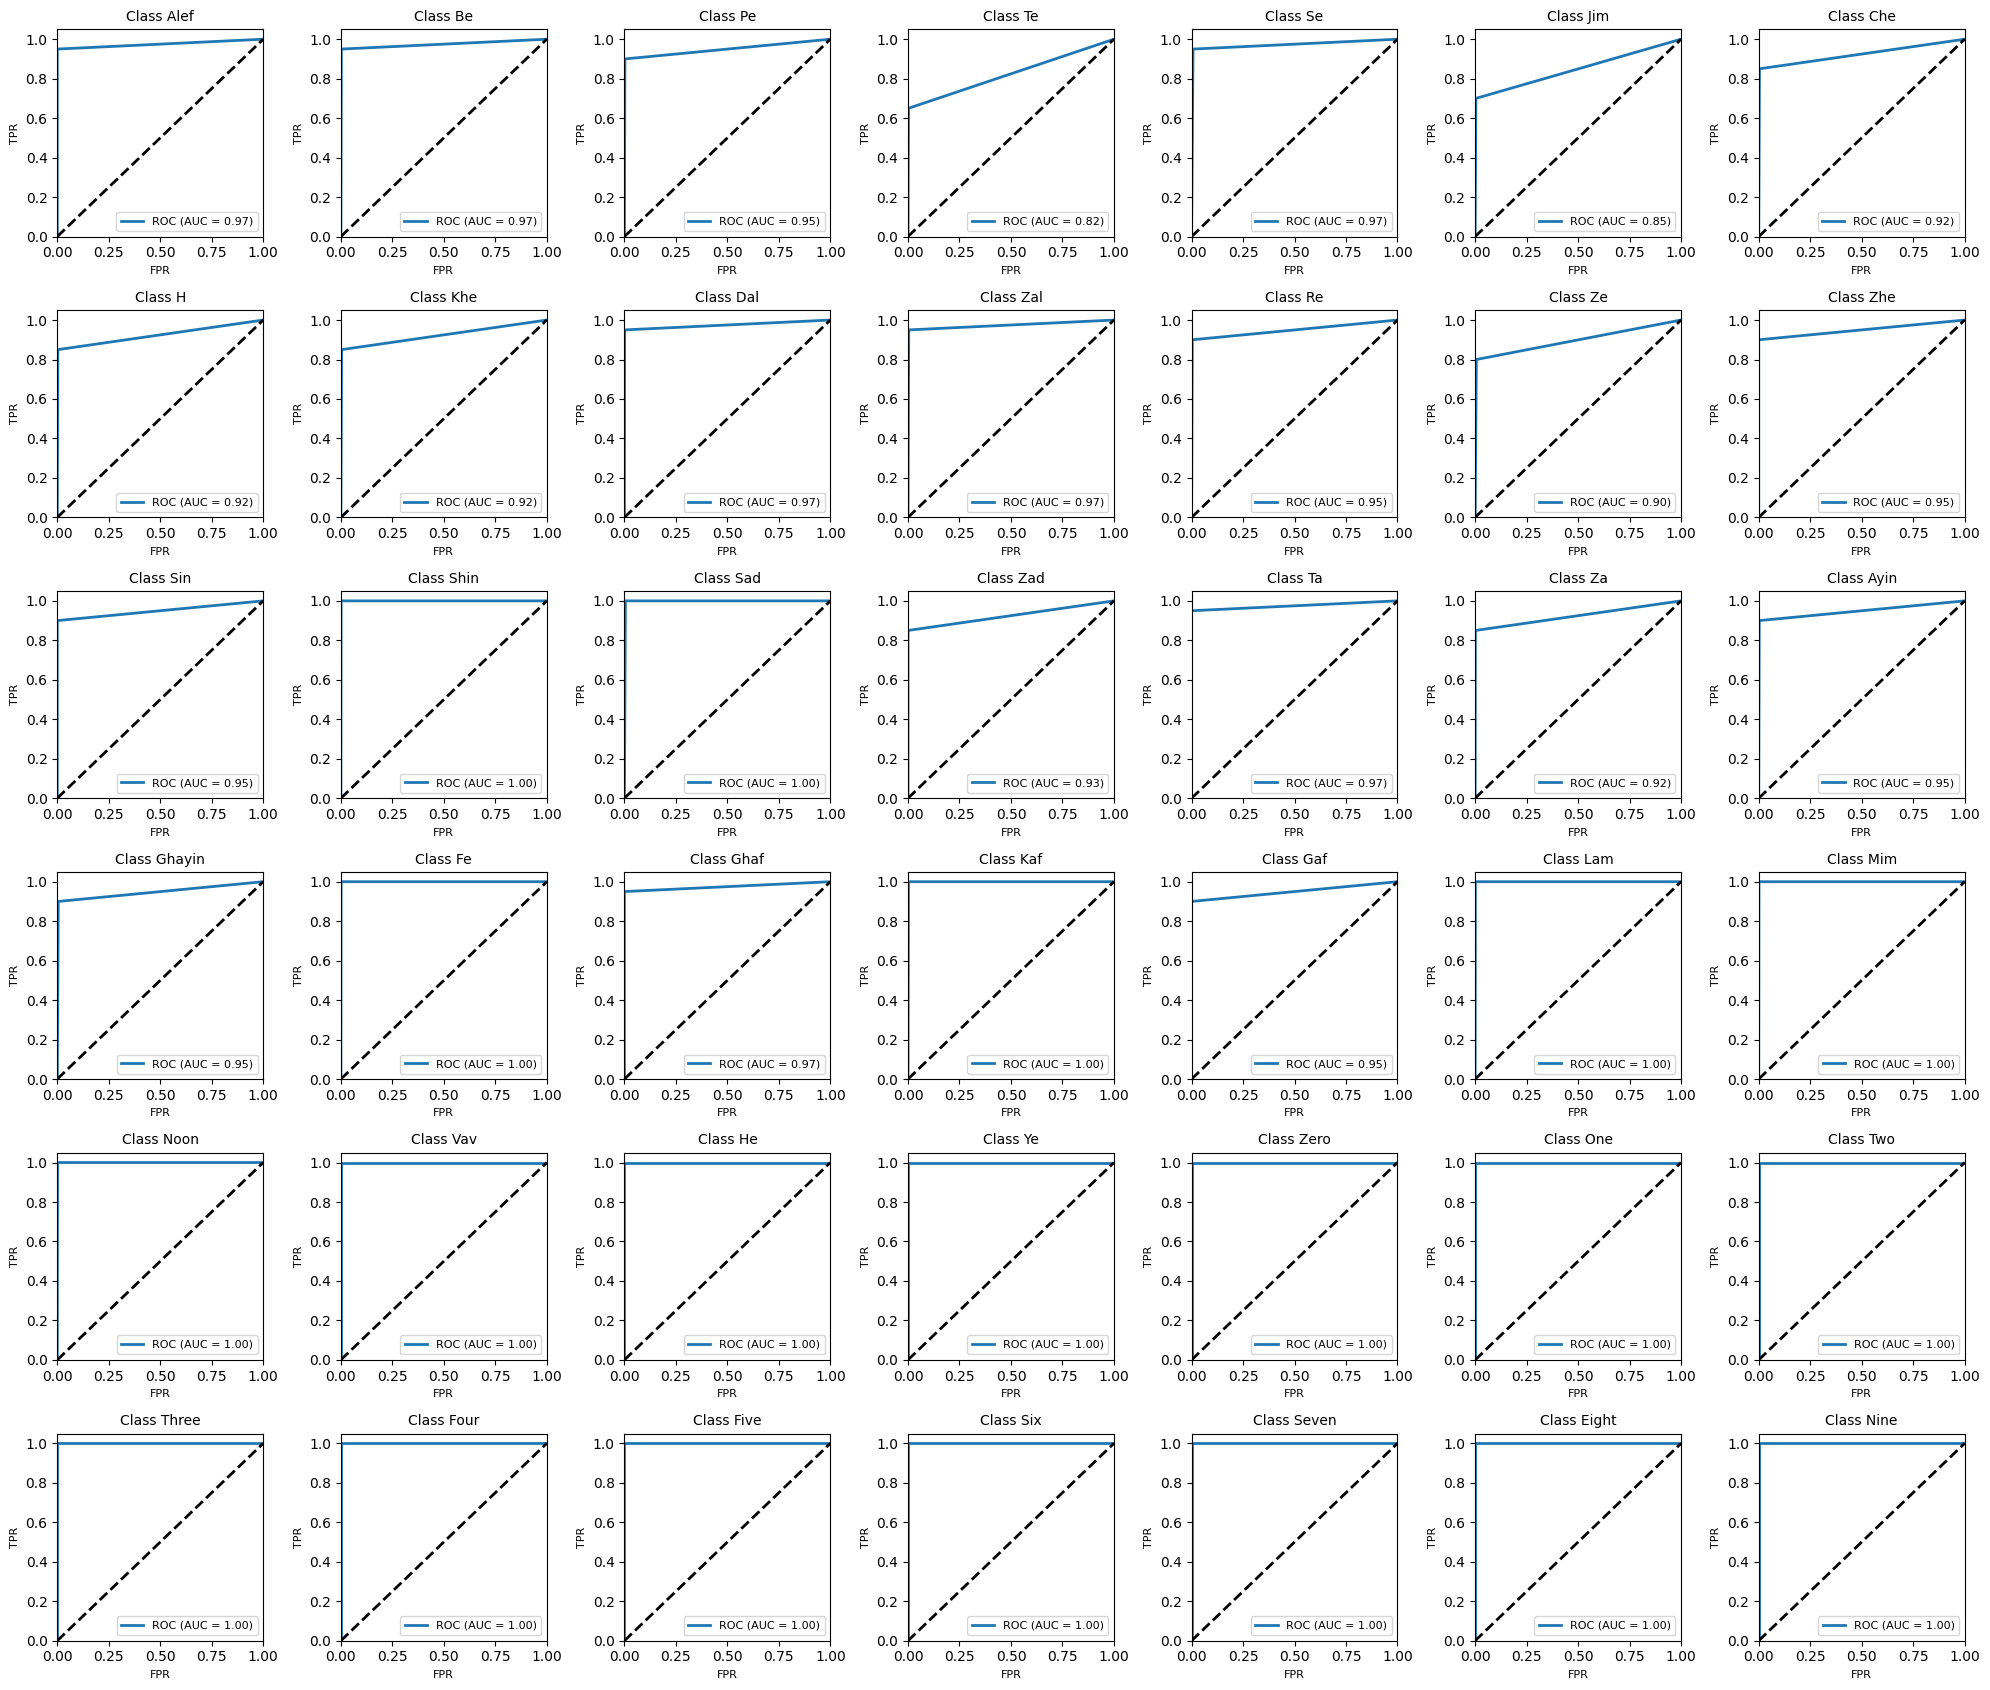

In [12]:
print(f"Validation Accuracy : {best_svm.score(X_test_1d, y_test)}")

predictions = best_svm.predict(X_test_1d)

print(predictions.shape)

y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

print(y_test_one_hot.shape)

predictions_one_hot = to_categorical(predictions, num_classes=CLASSES)

print(predictions_one_hot.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions_one_hot[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 6  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 17))

axes = axes.flatten()

for i in range(CLASSES-1):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

0 2.png [15]
1 alef.png [15]
2 be.png [15]
3 four.png [15]
4 he.png [15]
5 jim2.png [15]
6 noon.png [15]
7 re.png [15]
8 sin.png [15]
9 sin2.png [15]


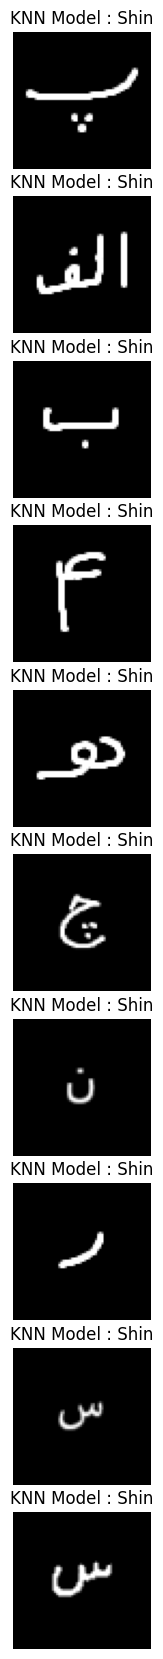

In [22]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    image = dataloader.centerize(image)

    predictions_test = best_svm.predict(image.reshape(1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))

    print(i, img_name, predictions_test)

    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'KNN Model : {LABELS[predictions_test[0]]}')
    plt.axis('off')

plt.show()